# Parametric Tests

## Parametric testing of the initialization of the Bonding Curve

In [1]:
import sys
sys.path.append('../')

### cadCAD Specification Diagram

In [2]:
# For displaying image files
from IPython.display import Image

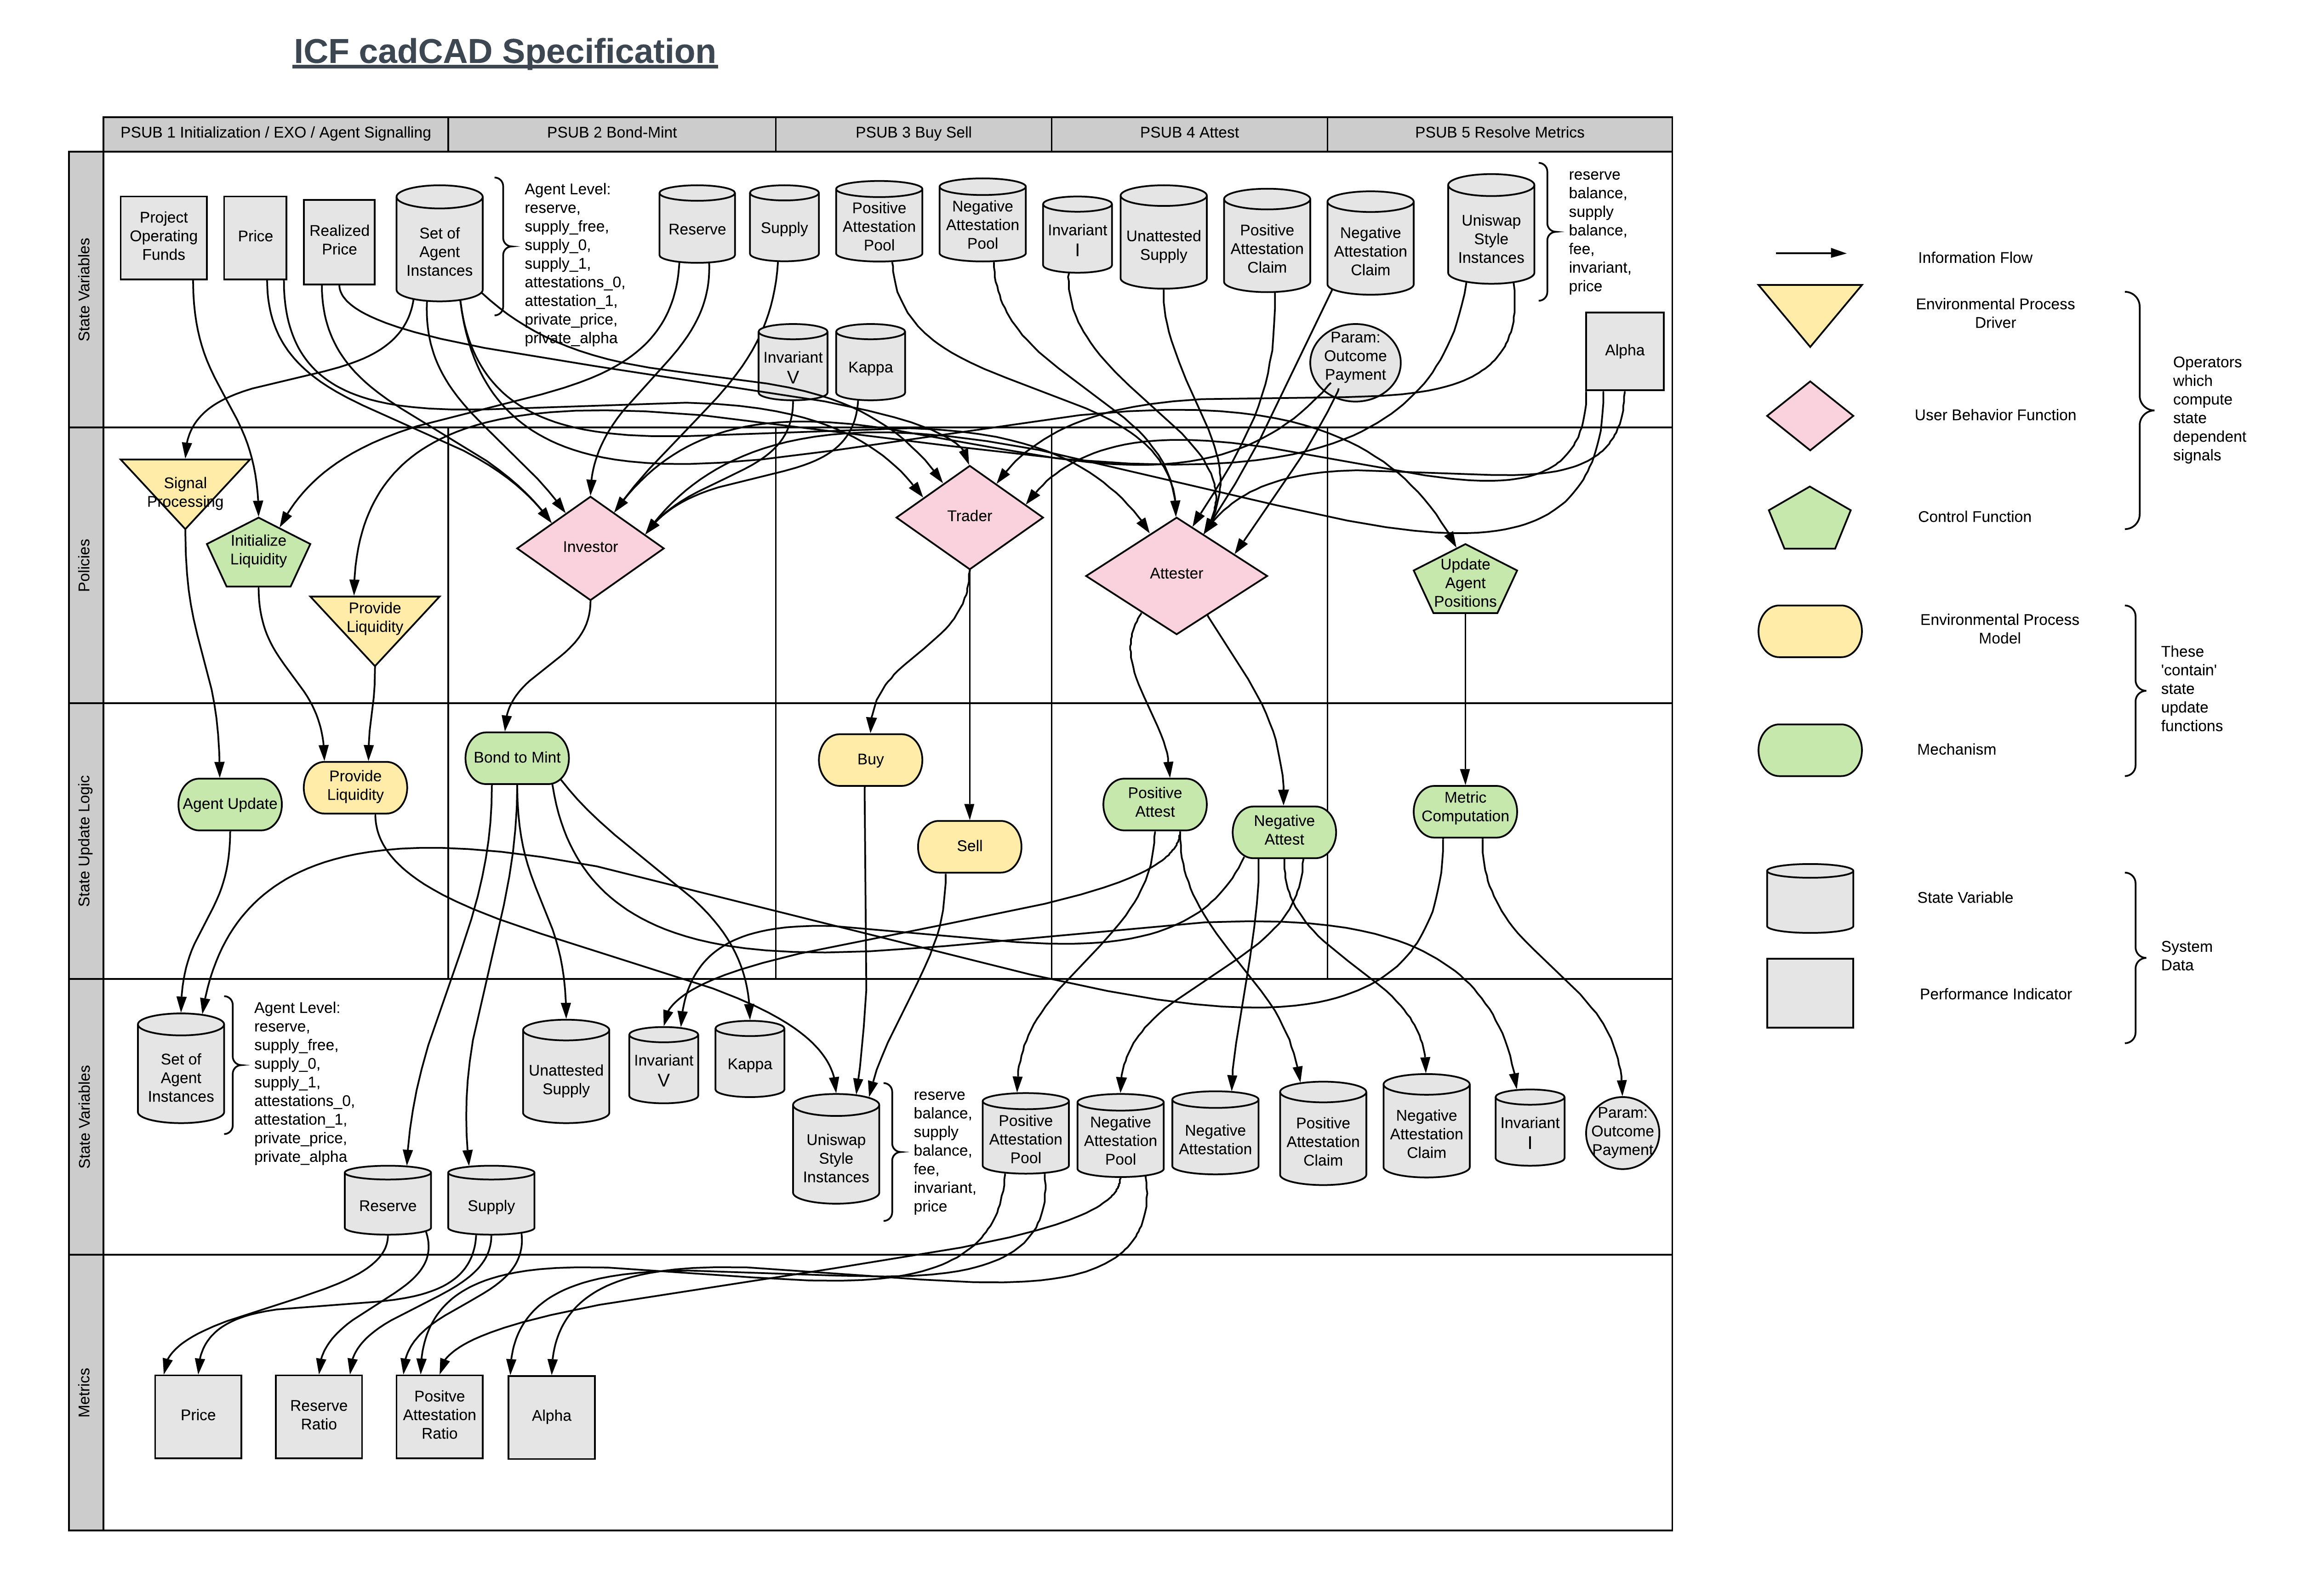

In [3]:
Image("..\images\Phase_3_secondary.png")
# print(sys.path)

### Import Libraries for Analysis and Visualization

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Installed cadCAD Installed Version Check

In [5]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


### Import Parent cadCAD Model and Utilities

In [6]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [7]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{&#39;N&#39;: 1,
 &#39;T&#39;: range(0, 100),
 &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
  &#39;starting_alpha&#39;: 0.5,
  &#39;money_raised&#39;: 66000,
  &#39;monthly_instalment&#39;: 3000,
  &#39;C&#39;: 72600,
  &#39;f&#39;: 0.03,
  &#39;m&#39;: 0.15,
  &#39;beta&#39;: 0.9,
  &#39;dust&#39;: 1e-08,
  &#39;period&#39;: 1200,
  &#39;rules_price&#39;: &#39;martin&#39;,
  &#39;E&#39;: 0.2,
  &#39;ENABLE_CONTINUOUS&#39;: True,
  &#39;THETA&#39;: 0.9,
  &#39;ENABLE_BURN&#39;: False,
  &#39;fee_numerator&#39;: 997,
  &#39;fee_denominator&#39;: 1000}}

### Choose a parameter and list of values to sweep over

In [8]:
update_params = {
    'ENABLE_BURN' : [False],
    # 'monthly_instalment' : [3000],
    # 'money_raised' : [6000],
    'THETA' : [0.9],
    # 'C' : [70000, 80000, 90000, 100000] 
}

### Update Timesteps, if desired
Current Number of TImesteps

In [9]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
New_Timesteps = range(365)
New_Timesteps

range(0, 365)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [10]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [11]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [12]:
parametric_experiment.get_config()

[{&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.9,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000}}]

### Get Initial Conditions from Config

In [13]:
initial_state = parametric_experiment.get_initial_conditions()
initial_state

{&#39;reserve&#39;: 66000,
 &#39;pbar&#39;: 1,
 &#39;realized_price&#39;: 0,
 &#39;spot_price&#39;: 1,
 &#39;kappa&#39;: 2,
 &#39;supply&#39;: 132000.0,
 &#39;alpha&#39;: 0.5,
 &#39;alpha_bar&#39;: 0.5,
 &#39;supply_0&#39;: 30000,
 &#39;supply_1&#39;: 0,
 &#39;supply_free&#39;: 102000.0,
 &#39;attestations&#39;: 30000,
 &#39;attestations_0&#39;: 30000,
 &#39;attestations_1&#39;: 0,
 &#39;invariant_V&#39;: 264000.0,
 &#39;invariant_I&#39;: 102300.0,
 &#39;agents&#39;:     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0          

In [14]:
initial_state['UNI_reserve'] = 6000
initial_state['UNI_supply'] = 12000
initial_state['reserve'] = 6000
initial_state['supply'] = 132000

### Re-Instantiate Config with Updated Initial Conditions

In [15]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [16]:
parametric_experiment.get_initial_conditions()

{&#39;reserve&#39;: 6000,
 &#39;pbar&#39;: 1,
 &#39;realized_price&#39;: 0,
 &#39;spot_price&#39;: 1,
 &#39;kappa&#39;: 2,
 &#39;supply&#39;: 132000,
 &#39;alpha&#39;: 0.5,
 &#39;alpha_bar&#39;: 0.5,
 &#39;supply_0&#39;: 30000,
 &#39;supply_1&#39;: 0,
 &#39;supply_free&#39;: 102000.0,
 &#39;attestations&#39;: 30000,
 &#39;attestations_0&#39;: 30000,
 &#39;attestations_1&#39;: 0,
 &#39;invariant_V&#39;: 264000.0,
 &#39;invariant_I&#39;: 102300.0,
 &#39;agents&#39;:     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0             

In [17]:

del configs[:]

parametric_experiment.append()

&lt;cadCAD.configuration.Experiment at 0x1c34c5d0088&gt;

In [18]:
parametric_experiment.get_config()

[{&#39;N&#39;: 1,
  &#39;T&#39;: range(0, 365),
  &#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.9,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000}}]

### Generate config_ids to match results with swept variable input

In [19]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

In [20]:
config_ids

[{&#39;M&#39;: {&#39;starting_kappa&#39;: 2,
   &#39;starting_alpha&#39;: 0.5,
   &#39;money_raised&#39;: 66000,
   &#39;monthly_instalment&#39;: 3000,
   &#39;C&#39;: 72600,
   &#39;f&#39;: 0.03,
   &#39;m&#39;: 0.15,
   &#39;beta&#39;: 0.9,
   &#39;dust&#39;: 1e-08,
   &#39;period&#39;: 1200,
   &#39;rules_price&#39;: &#39;martin&#39;,
   &#39;E&#39;: 0.2,
   &#39;ENABLE_CONTINUOUS&#39;: True,
   &#39;THETA&#39;: 0.9,
   &#39;ENABLE_BURN&#39;: False,
   &#39;fee_numerator&#39;: 997,
   &#39;fee_denominator&#39;: 1000},
  &#39;simulation_id&#39;: 0,
  &#39;run_id&#39;: 0,
  &#39;subset_id&#39;: 0}]

### Execute cadCAD Simulation

In [21]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 17, 1, 22)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.74s


In [22]:
experiments.head()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,chosen_agent,public_alpha,funds_from_bond,UNI_supply,UNI_reserve,simulation,subset,run,substep,timestep
0,0,6000.0,1.000000,0,1.000000,2.00,132000.000000,5.000000e-01,0.5,30000,...,0,0,0.000000,12000,6000,0,0,1,0,0
1,6,6000.0,-0.000000,0,1.062827,7.05,39799.497484,5.000000e-01,0.5,30000,...,"{'id': 17, 'agent_attestations_1': 0, 'agent_a...",0,0.000000,12000,6000,0,0,1,6,1
2,12,6000.0,0.000000,0,1.062827,7.05,39799.497484,7.074507e-19,0.5,30000,...,"{'id': 13.0, 'agent_attestations_1': 0.0, 'age...",0,0.000000,12000,6000,0,0,1,6,2
3,18,6000.0,0.000000,0,0.150756,1.00,39799.497484,3.095187e-17,0.5,30000,...,"{'id': 3.0, 'agent_attestations_1': 0.0, 'agen...",0,0.000000,12000,6000,0,0,1,6,3
4,24,6010.0,0.150756,0,0.148531,1.00,40462.822436,9.477321e-04,0.5,30000,...,"{'id': 6.0, 'agent_attestations_1': 0.0, 'agen...",0,89.999999,12000,6000,0,0,1,6,4


In [23]:
experiments.tail()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,chosen_agent,public_alpha,funds_from_bond,UNI_supply,UNI_reserve,simulation,subset,run,substep,timestep
361,2166,6190.0,-1.263744e-137,0,0.170328,1.438227,52267.43386,0.037364,0.5,30000,...,"{'id': 7.0, 'agent_attestations_1': 0.0, 'agen...",0,43710.0,12000,6000,0,0,1,6,361
362,2172,6190.0,-1.374390e-115,0,0.170328,1.438227,52267.43386,0.037364,0.5,30000,...,"{'id': 0.0, 'agent_attestations_1': 0.0, 'agen...",0,43710.0,12000,6000,0,0,1,6,362
363,2178,6190.0,-1.374390e-107,0,0.170328,1.438227,52267.43386,0.037364,0.5,30000,...,"{'id': 3.0, 'agent_attestations_1': 0.0, 'agen...",0,43710.0,12000,6000,0,0,1,6,363
364,2184,6190.0,-1.374390e-123,0,0.170328,1.438227,52267.43386,0.037364,0.5,30000,...,"{'id': 4.0, 'agent_attestations_1': 0.0, 'agen...",0,43710.0,12000,6000,0,0,1,6,364
365,2190,6190.0,-1.374390e-115,0,0.170328,1.438227,52267.43386,0.037364,0.5,30000,...,"{'id': 10.0, 'agent_attestations_1': 0.0, 'age...",0,43710.0,12000,6000,0,0,1,6,365


In [24]:
len(experiments)

366

### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

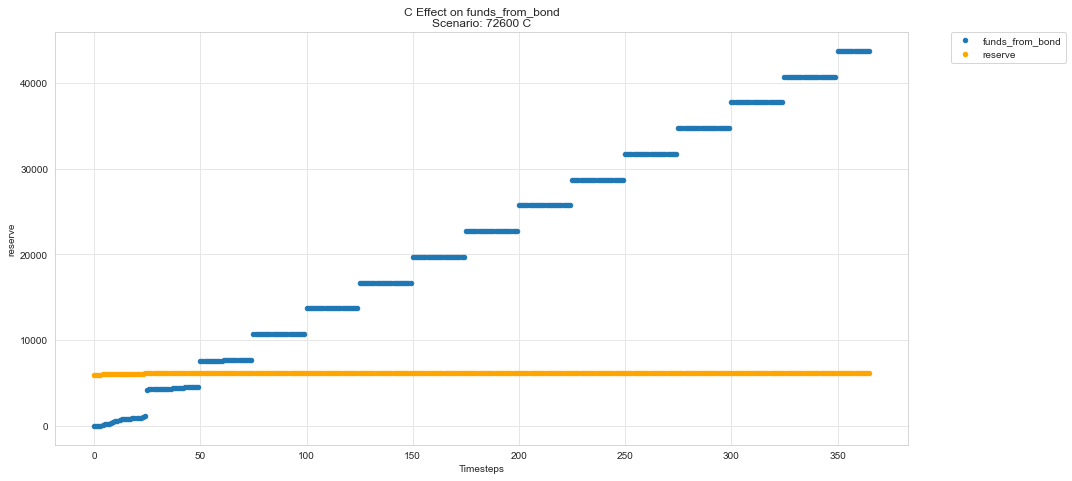

In [25]:
param_test_plot(experiments, config_ids, 'C','funds_from_bond', 'reserve')

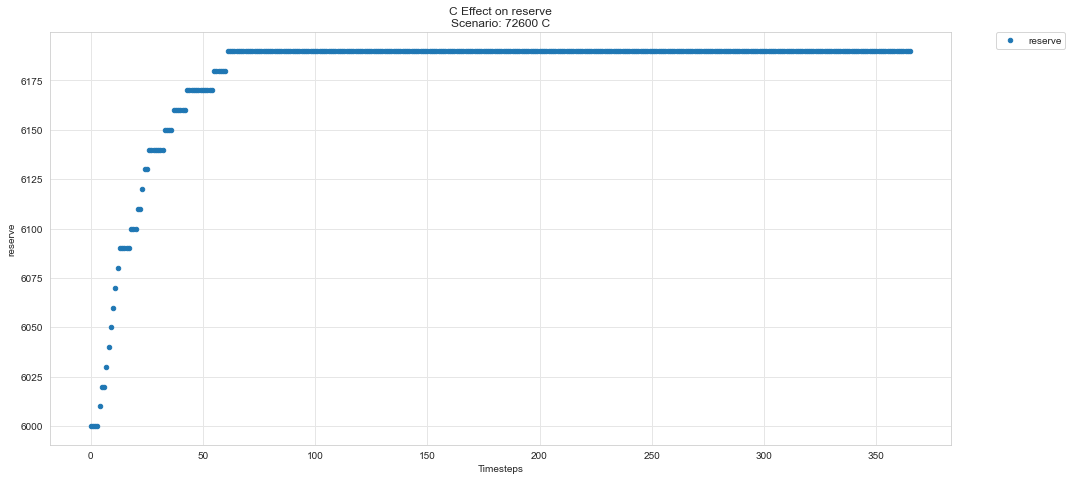

In [26]:
param_test_plot(experiments, config_ids, 'C', 'reserve')

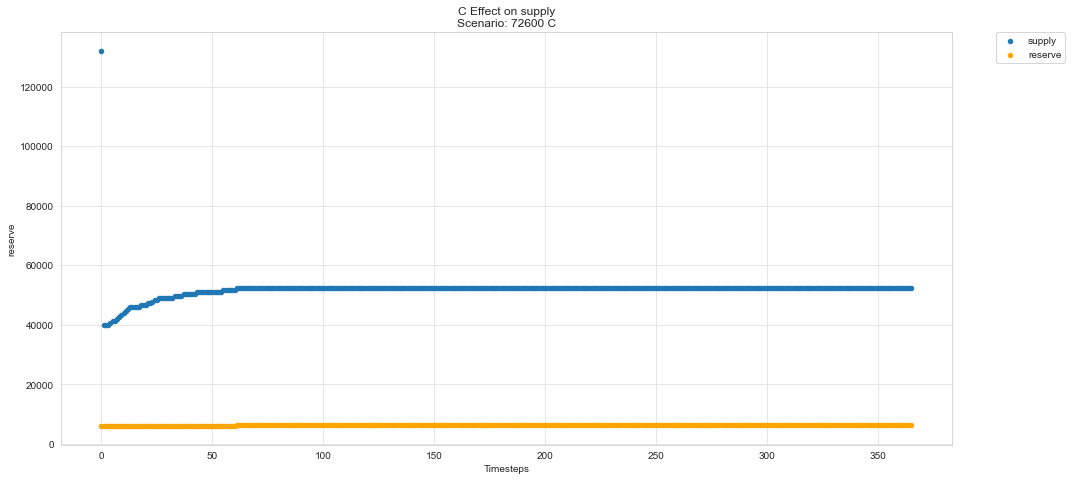

In [27]:
param_test_plot(experiments, config_ids, 'C','supply', 'reserve')

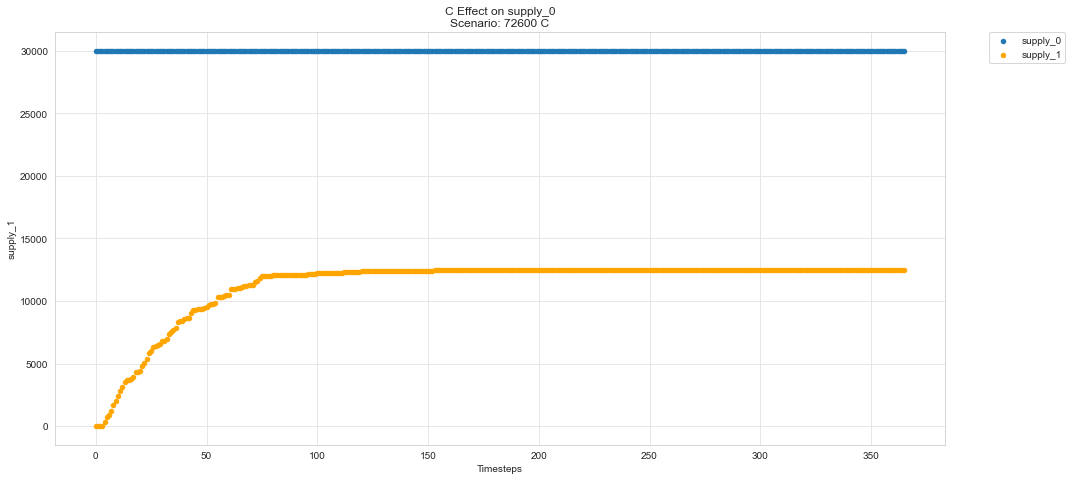

In [28]:
param_test_plot(experiments, config_ids, 'C','supply_0', 'supply_1')

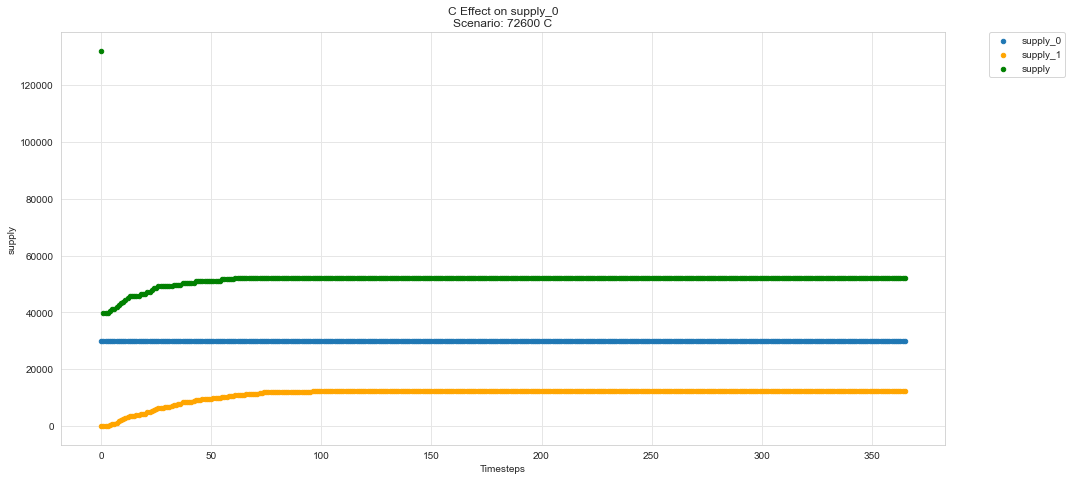

In [29]:
param_test_plot(experiments, config_ids, 'C','supply_0', 'supply_1', 'supply')

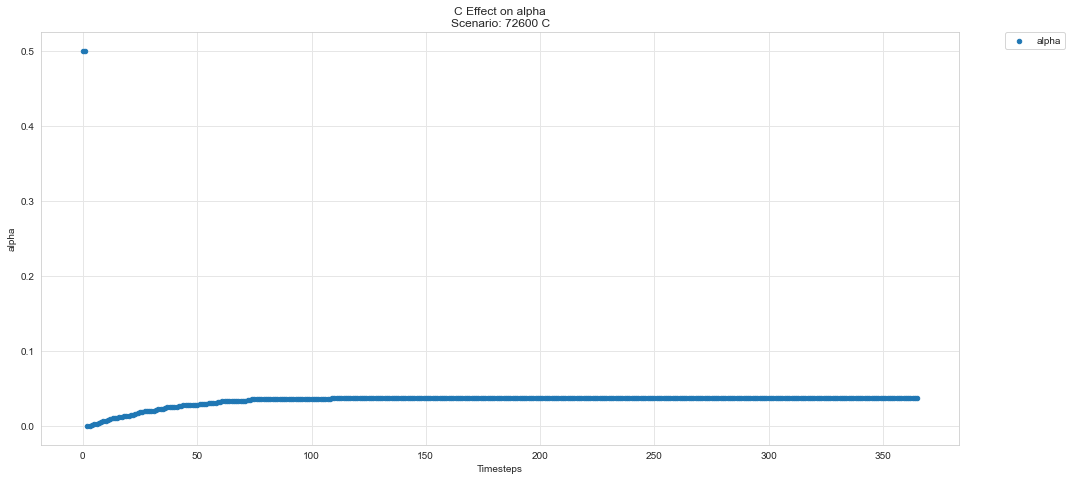

In [30]:
param_test_plot(experiments, config_ids, 'C','alpha')

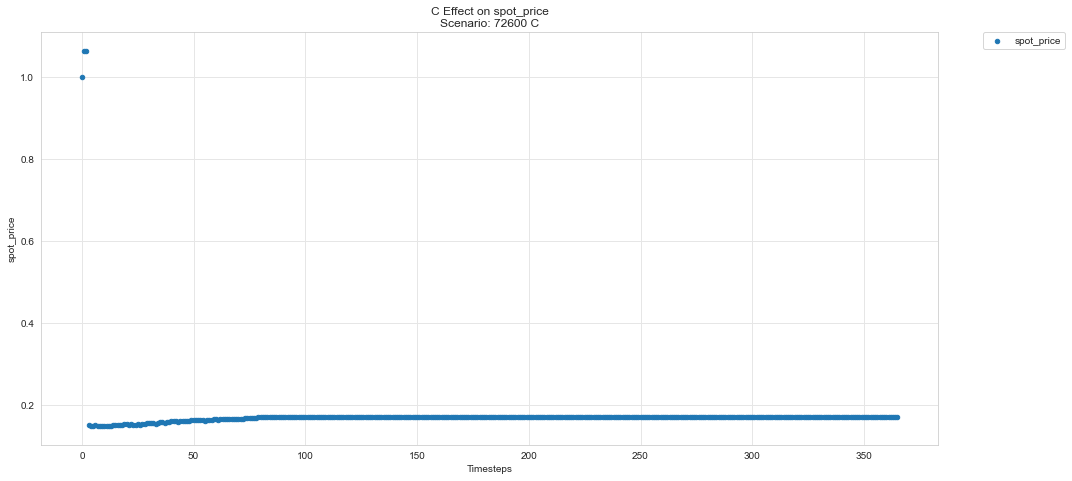

In [31]:
param_test_plot(experiments, config_ids, 'C', 'spot_price')

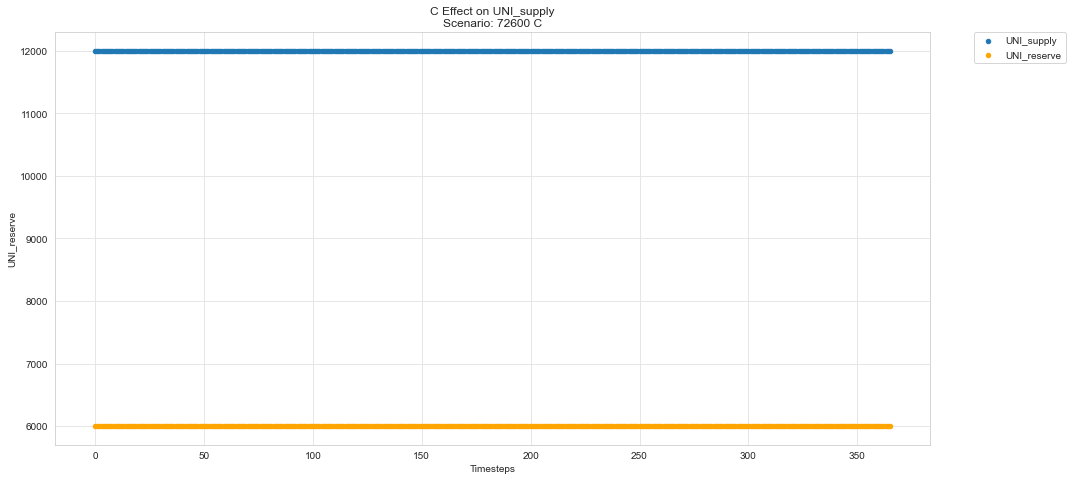

In [32]:
param_test_plot(experiments, config_ids, 'C','UNI_supply', 'UNI_reserve')

### Use for customizing plots

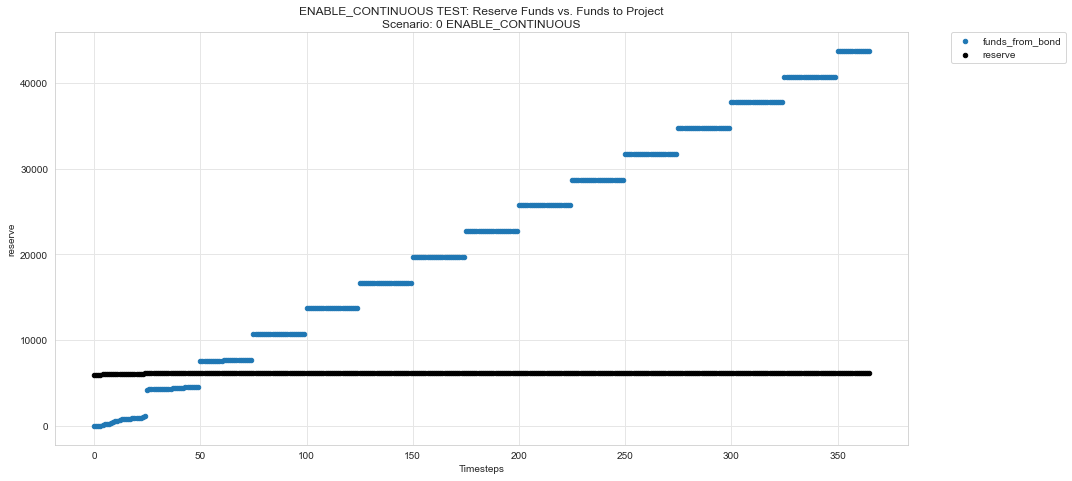

In [33]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['subset']
    cc_label = experiments.iloc[cc_idx]['subset']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['subset']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    df = sub_experiments.copy()
    colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

    ax = axs
    title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
    # + 'Scenario: ' + str(cc_label)  + ' rules_price'
    ax.set_title(title)
    ax.set_ylabel('Funds')

    df.plot(x='timestep', y='funds_from_bond', label='funds_from_bond', ax=ax, legend=True, kind ='scatter')
    df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5], kind ='scatter')

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_xlabel('Timesteps')
    ax.grid(color='0.9', linestyle='-', linewidth=1)

    plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()